In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Understanding the data
FuelConsumption.csv: Contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014 MAKE e.g. Acura MODEL e.g. ILX VEHICLE CLASS e.g. SUV ENGINE SIZE e.g. 4.7 CYLINDERS e.g 6 TRANSMISSION e.g. A6 FUELTYPE e.g. z FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9 FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9 FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2 CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [2]:
# The code was removed by Watson Studio for sharing.

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


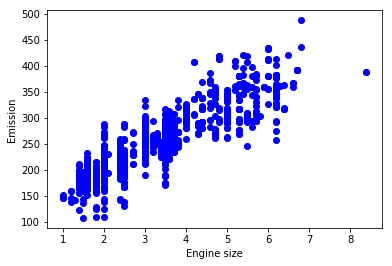

In [3]:
# Plot emissions with respect to engine size to see relationship
plt.scatter(df_fuel.ENGINESIZE, df_fuel.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [4]:
#Split data into training and testing datasets
msk = np.random.rand(len(df_fuel)) < 0.8
train = df_fuel[msk]
test = df_fuel[~msk]

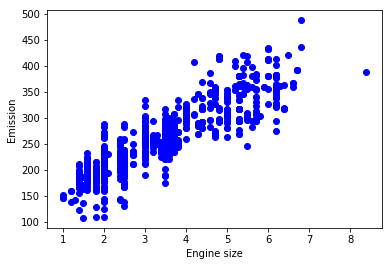

In [5]:
# Training data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

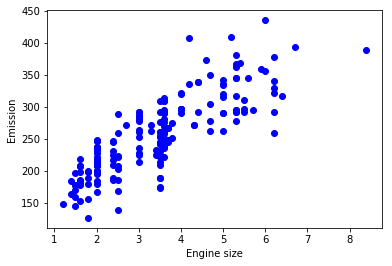

In [6]:
# Testing data distribution
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

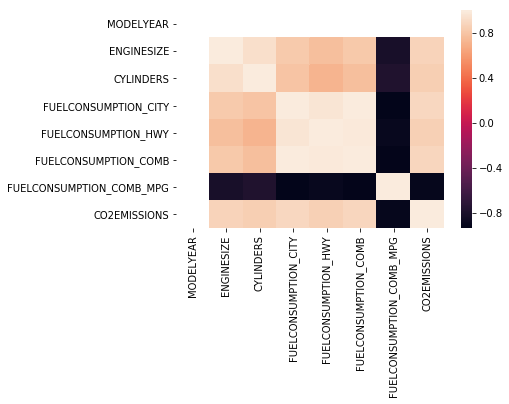

In [7]:
# Explore correlations further

corr = df_fuel.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
# Another way to examine feature correlation

corr = df_fuel.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,nan,nan,nan,nan,nan,nan,nan,nan
ENGINESIZE,nan,1,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,nan,0.93,1,0.8,0.72,0.78,-0.77,0.85
FUELCONSUMPTION_CITY,nan,0.83,0.8,1,0.97,1,-0.94,0.9
FUELCONSUMPTION_HWY,nan,0.78,0.72,0.97,1,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,nan,0.82,0.78,1,0.99,1,-0.93,0.89
FUELCONSUMPTION_COMB_MPG,nan,-0.81,-0.77,-0.94,-0.89,-0.93,1,-0.91
CO2EMISSIONS,nan,0.87,0.85,0.9,0.86,0.89,-0.91,1


In [17]:
# Select features of interest for model
cdf = df_fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

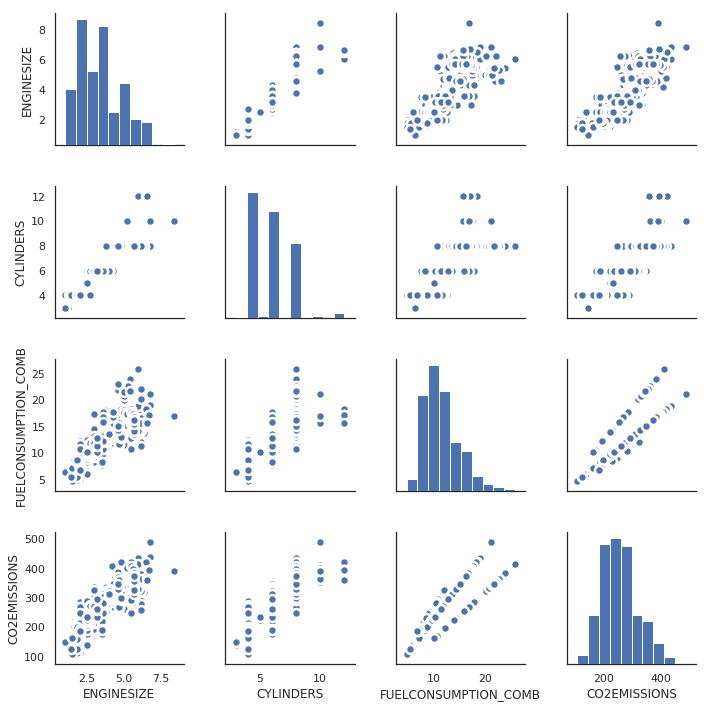

In [18]:
# Another way of examining correlations is by looking at scatter plots
sns.pairplot(cdf, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


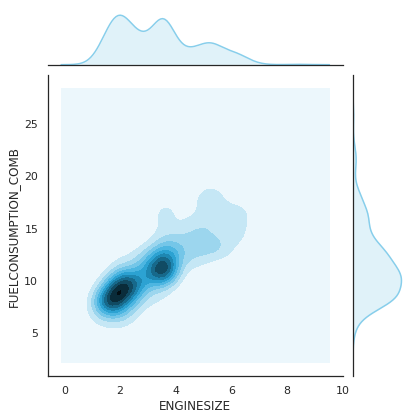

In [19]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_fuel["ENGINESIZE"], y=df_fuel["FUELCONSUMPTION_COMB"], kind='kde', color="skyblue")


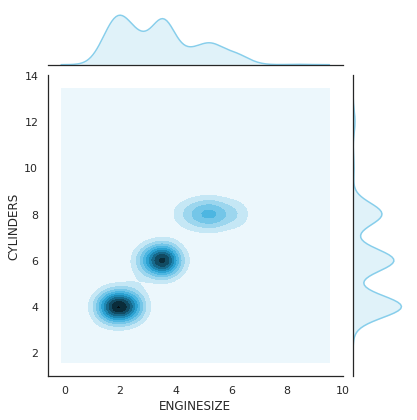

In [20]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_fuel["ENGINESIZE"], y=df_fuel["CYLINDERS"], kind='kde', color="skyblue")


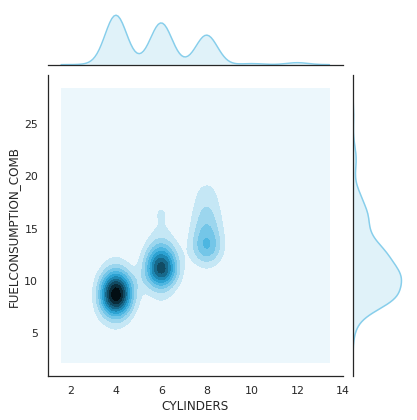

In [21]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_fuel["CYLINDERS"], y=df_fuel["FUELCONSUMPTION_COMB"], kind='kde', color="skyblue")


## Model the data

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[12.62950807  7.02140287  9.24952642]]


## Algorithm Definition
As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS) OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [23]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
X_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 615.06
Variance score: 0.83


In [24]:
# Show actual vs predicted values

for i in range(len(y_hat)):
     print("Actual=%s, Predicted=%s" % (y_test[i], y_hat[i]))

Actual=[267], Predicted=[262.64756536]
Actual=[359], Predicted=[369.55900598]
Actual=[224], Predicted=[223.28347253]
Actual=[227], Predicted=[224.20842517]
Actual=[407], Predicted=[339.42723628]
Actual=[409], Predicted=[367.02450272]
Actual=[336], Predicted=[310.75370438]
Actual=[290], Predicted=[289.72874993]
Actual=[297], Predicted=[292.50360786]
Actual=[292], Predicted=[263.98138877]
Actual=[237], Predicted=[215.11021157]
Actual=[237], Predicted=[215.11021157]
Actual=[322], Predicted=[302.67808692]
Actual=[200], Predicted=[200.3109693]
Actual=[292], Predicted=[295.7055058]
Actual=[356], Predicted=[369.89700414]
Actual=[214], Predicted=[232.53299895]
Actual=[338], Predicted=[314.20455864]
Actual=[338], Predicted=[314.20455864]
Actual=[253], Predicted=[248.25719386]
Actual=[200], Predicted=[200.3109693]
Actual=[290], Predicted=[270.63414097]
Actual=[264], Predicted=[260.45966191]
Actual=[246], Predicted=[218.81002214]
Actual=[189], Predicted=[200.73800932]
Actual=[248], Predicted=[219

In [55]:
# Add predictions to original dataframe

df_yhat = pd.DataFrame(y_hat)
df_yhat.columns  = ['PREDICTION']
np.asanyarray(df_yhat[['PREDICTION']])


df_model_output = pd.merge(cdf,df_yhat,how = 'left',left_index = True, right_index = True)
df_model_output.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,PREDICTION
0,2.0,4,8.5,196,262.647565
1,2.4,4,9.6,221,369.559006
2,1.5,4,5.9,136,223.283473
3,3.5,6,11.1,255,224.208425
4,3.5,6,10.6,244,339.427236


### Evaluate model further

In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Explained variance regression score:
If 𝑦̂ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦} The best possible score is 1.0, lower values are worse.

In [27]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,y_hat))

Variance score: 0.8313


In [28]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,y_hat))

MAE: 18.5903


In [29]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,y_hat))

MSE: 615.0593


In [30]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_hat))
print('RMSE: %.4f' % rmse)

RMSE: 24.8004


In [31]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,y_hat))

R2: 0.8304


## Ridge Regression
Ridge regression is a regularized version of Linear regression, meaning a regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. It is important to note that the regularization term should only be added to the cost function during training; whereas model performance should be done unregularized.

In [32]:
# Modify train and test data by adding an additiona feature if necessary

X_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

In [33]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train,y_train)

# The coefficients
print ('Coefficients: ', ridge_reg.coef_)

Coefficients:  [[12.5871935   7.04296441  9.2542046 ]]


In [34]:
# Predict
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
X_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

ridge_yhat = ridge_reg.predict(X_test)
ridge_yhat

array([[262.63682019],
       [369.60325074],
       [223.28690958],
       [224.21233004],
       [339.4669938 ],
       [367.06553658],
       [310.77895955],
       [289.75311166],
       [292.52937304],
       [264.0054098 ],
       [215.12219645],
       [215.12219645],
       [302.70899809],
       [200.31546909],
       [295.71340952],
       [369.93654963],
       [232.54111417],
       [314.22181871],
       [314.22181871],
       [248.27326198],
       [200.31546909],
       [270.63230544],
       [260.45268038],
       [218.82387828],
       [200.7232442 ],
       [219.74929874],
       [337.80418748],
       [352.61091483],
       [270.63230544],
       [262.3035213 ],
       [318.37035783],
       [304.48905093],
       [177.95642564],
       [388.47888411],
       [342.20786114],
       [388.47888411],
       [373.22898762],
       [272.03997722],
       [307.04188367],
       [349.61122481],
       [186.28520977],
       [249.34763487],
       [251.19847579],
       [217

In [35]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,ridge_yhat))

Variance score: 0.8314


In [36]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,ridge_yhat))

MAE: 18.5855


In [37]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,ridge_yhat))

MSE: 614.8518


In [38]:
rmse = sqrt(mean_squared_error(y_test, ridge_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 24.7962


In [39]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,ridge_yhat))

R2: 0.8304


Ridge regressor performed similarly to original linear model. Perhaps adjusting learining rate will make a difference.

## Lasso Regression 
Another regularized version of Linear regression. It tends to completely eliminate the weights of the least important features (i.e., set them to zero).

In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)

# The coefficients
print ('Coefficients: ', lasso_reg.coef_)

Coefficients:  [12.48157124  7.06073862  9.27517737]


In [41]:
# Predict

lasso_yhat = lasso_reg.predict(X_test)
lasso_yhat

array([262.60200452, 369.52660241, 223.25681934, 224.18433708,
       339.54284932, 367.07341553, 310.78979948, 289.74313049,
       292.5256837 , 264.06759976, 215.20412561, 215.20412561,
       302.72837881, 200.36384182, 295.66327673, 369.8472418 ,
       232.53199671, 314.21363146, 314.21363146, 248.29979823,
       200.36384182, 270.62902477, 260.42632966, 218.91419655,
       200.71888163, 219.84171429, 337.60797743, 352.44826122,
       270.62902477, 262.28136514, 318.13010496, 304.2173389 ,
       178.03461528, 388.51825169, 342.14236484, 388.51825169,
       373.13989039, 271.94598274, 306.89669084, 349.56250674,
       186.38227492, 249.29611682, 251.15115229, 217.41420089,
       312.81683707, 265.06391835, 251.15115229, 330.82911431,
       257.64377645, 257.64377645, 248.36859908, 282.68675535,
       199.43632408, 298.45455687, 330.62271176, 338.75293328,
       299.98895296, 270.30838538, 276.80100954, 320.77505647,
       370.86101426, 192.26802072, 206.85646597, 253.32

In [42]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,lasso_yhat))

Variance score: 0.8316


In [43]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,lasso_yhat))

MAE: 18.5644


In [44]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,lasso_yhat))

MSE: 614.0246


In [45]:
rmse = sqrt(mean_squared_error(y_test, lasso_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 24.7795


In [46]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,lasso_yhat))

R2: 0.8307


Lasso also performed very similary to Ridge and the original linear model 

## Elastic Net 
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is simple mix of both Ridge and Lasso's regularization terms, and I can control the mix ratio 'r'. When r=0, Elastic Net is equivalent to Ridge and when r=1, it is equivalent to Lasso. In other words, r=0.5 would give me a nice mix of both.

In [48]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', elastic_net.coef_)

Coefficients:  [11.1568409   7.69917142  9.42896224]


In [49]:
# Predict

elastic_yhat = elastic_net.predict(X_test)
print(elastic_yhat)

[262.25748302 370.71341045 223.332119   224.27501523 340.75091596
 368.24899591 311.52113302 290.43184036 293.26052903 264.81955285
 215.63485975 215.63485975 303.63238749 200.54852017 295.83747294
 370.88619831 232.76108124 314.69539742 314.69539742 248.79031705
 200.54852017 270.57076117 260.1989027  219.40644464 200.29677541
 220.34934087 335.72060726 350.80694684 270.57076117 262.08469515
 315.91978655 301.7763432  178.76807605 388.85349745 341.70868626
 388.85349745 372.14798426 270.83738    305.87862975 349.25185605
 187.25414206 248.88414802 250.76994046 217.26890744 311.28426233
 264.91338382 250.76994046 328.5230132  257.37021403 257.37021403
 247.94125179 282.82841208 199.60562394 298.85764788 331.07020896
 338.10988923 300.57065246 270.3979733  276.99824687 320.44660573
 371.36300182 193.08430727 207.14879373 252.82852078 203.6289536
 336.05130891 399.22535591 270.83738    305.87862975 331.00612614
 304.51502523 270.57076117 359.62371451 316.25048821 359.62371451
 385.694107

In [50]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,elastic_yhat))

Variance score: 0.8333


In [51]:
# Mean Absolute Error
print('MAE: %.4f' % mean_absolute_error(y_test,elastic_yhat))

MAE: 18.4242


In [52]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,elastic_yhat))

MSE: 607.7791


In [53]:
rmse = sqrt(mean_squared_error(y_test, elastic_yhat))
print('RMSE: %.4f' % rmse)

RMSE: 24.6532


In [54]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,elastic_yhat))

R2: 0.8324


## Summary

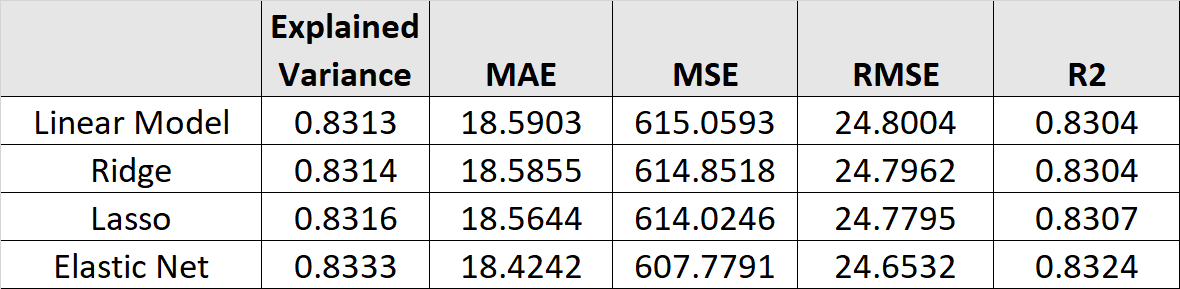



### Based on the model performance report, Elastic Net performed the best.

## Final Model Output

In [57]:
# Attach elastic net predictions to original dataframe

df_yhat = pd.DataFrame(elastic_yhat)
df_yhat.columns  = ['PREDICTION']
np.asanyarray(df_yhat[['PREDICTION']])


df_model_output = pd.merge(df_fuel,df_yhat,how = 'left',left_index = True, right_index = True)
df_model_output.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,PREDICTION
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,262.257483
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,370.713410
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,223.332119
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,224.275015
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,340.750916
